In [36]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
import scipy.stats as st

1.	How would you estimate the impact the weather has on Uber pickups?

            a.	Do certain weather conditions lead to an increase or decrease in pickups?

            b.	Are there any correlations between weather variables and pickups?


pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [37]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Resources/clean.csv")
df

,pickup_date,pickup_time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01,01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01,01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01,01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01,01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2015-06-30,23:00:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26054,2015-06-30,23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26055,2015-06-30,23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26056,2015-06-30,23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [38]:
df.columns

Index(['pickup_date', 'pickup_time', 'borough', 'pickups', 'spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'],
      dtype='object')

In [39]:
correlations = df[['pickups', 'spd', 'vsb', 'temp', 'dewp','pcp01', 'pcp06', 'pcp24']].corr()
correlations

,pickups,spd,vsb,temp,dewp,pcp01,pcp06,pcp24
pickups,1.000000,0.009741,-0.008429,0.063692,0.040082,0.005007,-0.002821,-0.022935
spd,0.009741,1.000000,0.086177,-0.296126,-0.321606,-0.000357,0.016668,-0.010412
vsb,-0.008429,0.086177,1.000000,0.025214,-0.231294,-0.488407,-0.118346,0.000895
temp,0.063692,-0.296126,0.025214,1.000000,0.896544,-0.013343,-0.037295,-0.014408
dewp,0.040082,-0.321606,-0.231294,0.896544,1.000000,0.115399,0.013293,0.001519
pcp01,0.005007,-0.000357,-0.488407,-0.013343,0.115399,1.000000,0.128064,0.000997
pcp06,-0.002821,0.016668,-0.118346,-0.037295,0.013293,0.128064,1.000000,0.251166
pcp24,-0.022935,-0.010412,0.000895,-0.014408,0.001519,0.000997,0.251166,1.000000


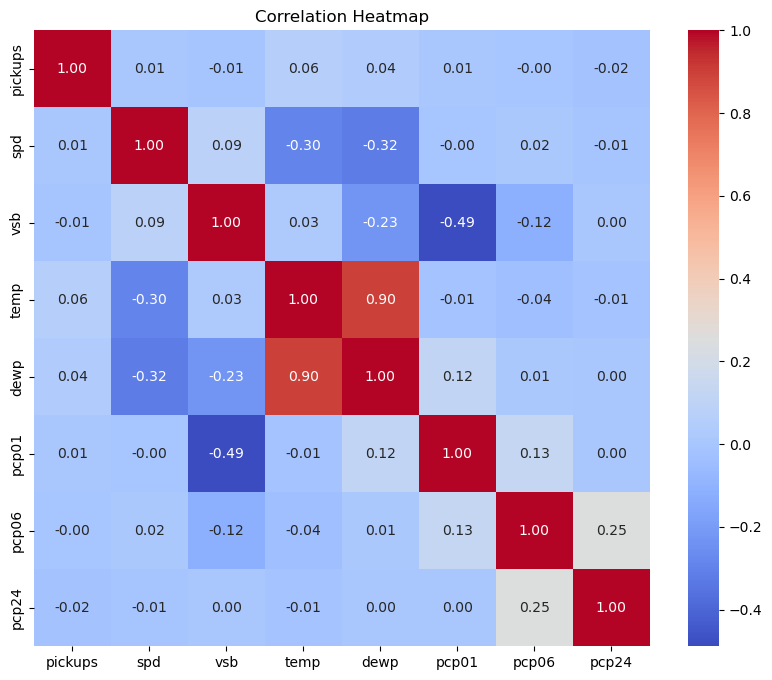

In [82]:
# Create a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [40]:
pearson_coefficient, p_value = pearsonr(df['pickups'], df['temp'])
print(pearson_coefficient)
print(p_value)

0.06369218205057037
7.699909173236099e-25


In [41]:
sort_df = df.sort_values(by='pickups',ascending=False)
sort_df


,pickup_date,pickup_time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
25617,2015-06-27,22:00:00,Manhattan,7883,8.00,5.50,60.00,56.50,1016.9,0.065000,0.00,0.00,0.0,N
25611,2015-06-27,21:00:00,Manhattan,7801,8.00,3.50,61.50,56.00,1017.0,0.045000,0.00,0.00,0.0,N
25623,2015-06-27,23:00:00,Manhattan,7711,10.25,3.20,60.75,57.25,1015.7,0.076667,0.01,0.00,0.0,N
25605,2015-06-27,20:00:00,Manhattan,7512,9.00,8.00,65.00,55.00,1018.2,0.010000,0.00,0.25,0.0,N
19575,2015-05-16,23:00:00,Manhattan,7271,0.00,9.10,71.00,60.00,1019.2,0.000000,0.00,0.00,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,2015-05-10,19:00:00,EWR,0,5.50,10.00,83.00,65.00,1021.2,0.000000,0.00,0.00,0.0,Y
6290,2015-02-13,17:00:00,EWR,0,14.00,10.00,16.00,-8.00,1020.8,0.000000,0.00,0.00,8.0,N
6296,2015-02-13,18:00:00,EWR,0,13.00,10.00,18.00,-6.00,1019.9,0.000000,0.00,0.00,8.0,N
18674,2015-05-10,17:00:00,EWR,0,6.00,9.55,80.50,63.00,1022.3,0.000000,0.00,0.00,0.0,Y


In [42]:
max_df = df.groupby('pickup_date')[['pickups','temp']].max()
max_df

,pickups,temp
pickup_date,,
2015-01-01,5258,39.000000
2015-01-02,2370,42.000000
2015-01-03,3979,40.000000
2015-01-04,2696,55.000000
2015-01-05,2813,55.333333
...,...,...
2015-06-26,5310,80.000000
2015-06-27,7883,73.000000
2015-06-28,7140,72.000000


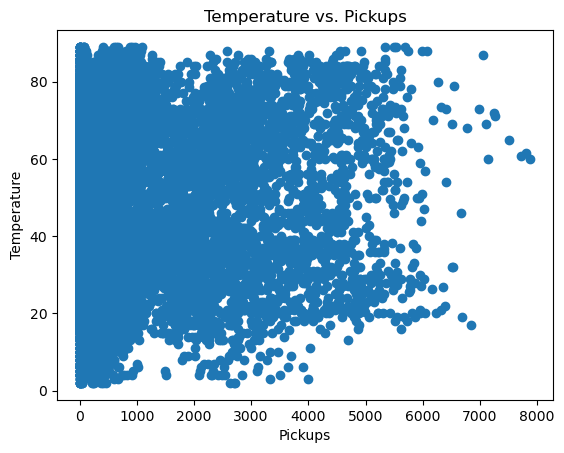

In [43]:

plt.scatter(sort_df['pickups'],sort_df['temp'])
plt.ylabel('Temperature')
plt.xlabel('Pickups')
plt.title('Temperature vs. Pickups')
plt.show()

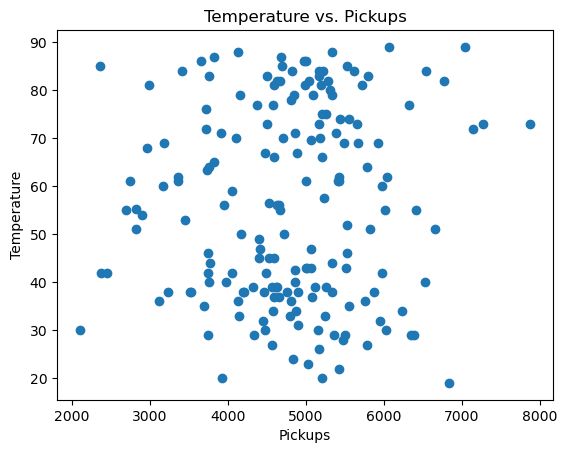

In [44]:

plt.scatter(max_df['pickups'],max_df['temp'])
plt.ylabel('Temperature')
plt.xlabel('Pickups')
plt.title('Temperature vs. Pickups')
plt.show()

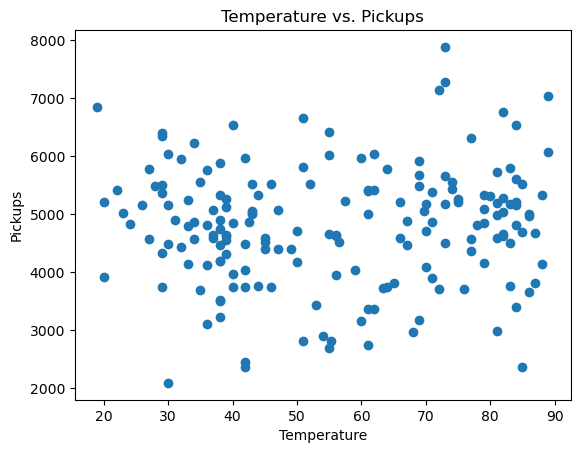

In [45]:
plt.scatter(max_df['temp'],max_df['pickups'])
plt.xlabel('Temperature')
plt.ylabel('Pickups')
plt.title('Temperature vs. Pickups')
plt.show()

The correlation between pickups and the temp is 0.06
The r-squared is: 0.0
The r-value is: 0.06


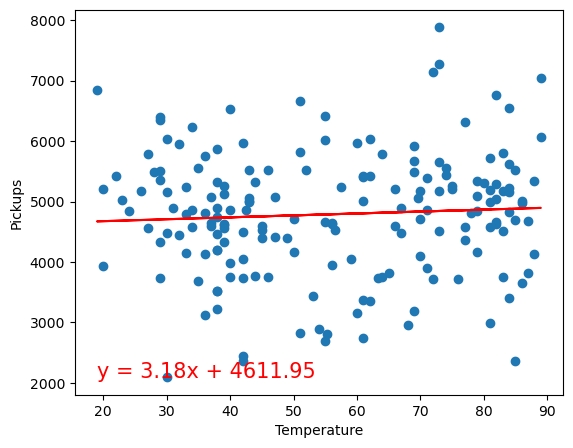

In [58]:
pickups = max_df['pickups']
temp = max_df['temp']
correlation = st.pearsonr(temp,pickups)
print(f"The correlation between pickups and the temp is {round(correlation[0],2)}")
plt.figure(figsize=(6.3,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp,pickups)
regress_values = (temp * slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(temp, pickups)
plt.plot(temp, regress_values,"r-")
plt.annotate(line_eq, (min(temp),min(pickups)), fontsize=15, color="red")

plt.ylabel("Pickups")
plt.xlabel("Temperature")
print(f"The r-squared is: {round(rvalue**2, 2)}")
print(f"The r-value is: {round(rvalue, 2)}")


plt.show()


The Pearson correlation coefficient of 0.06 indicates a very weak positive linear relationship between "Temperature" and "Pickups." This means that as "Temperature" increases, there is a slight tendency for "Pickups" to increase as well, but the relationship is extremely weak, and the correlation is close to zero. The scatter plot and the regression line further emphasize this weak relationship, as the data points are scattered widely around the regression line, and the regression line itself has a very shallow slope, indicating that "Temperature" has very little predictive power for explaining variations in "Pickups."

Additionally, the low r-squared value of 0.0 confirms that the linear regression model is not a good fit for this data, and it cannot effectively predict "Pickups" based on "Temperature."

In [78]:
df.columns

Index(['pickup_date', 'pickup_time', 'borough', 'pickups', 'spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'],
      dtype='object')

The correlation between pickups and the temp is -0.08
The r-squared is: 0.01
The r-value is: -0.08


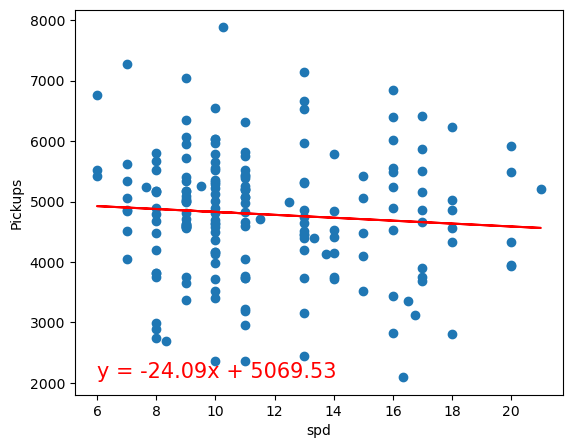

The correlation between pickups and the temp is -0.01
The r-squared is: 0.0
The r-value is: -0.01


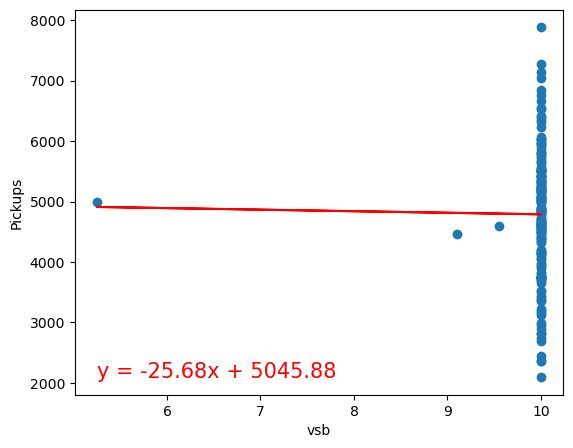

The correlation between pickups and the temp is 0.06
The r-squared is: 0.0
The r-value is: 0.06


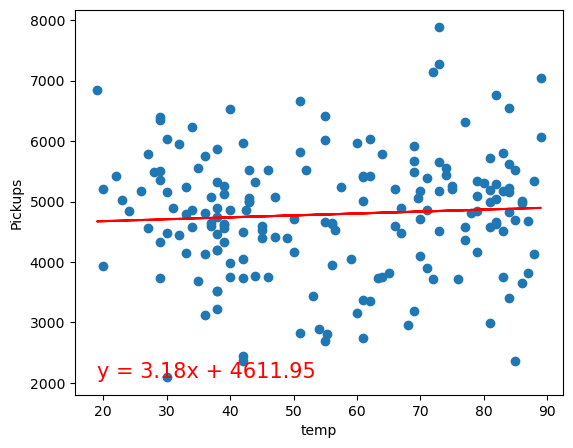

The correlation between pickups and the temp is 0.08
The r-squared is: 0.01
The r-value is: 0.08


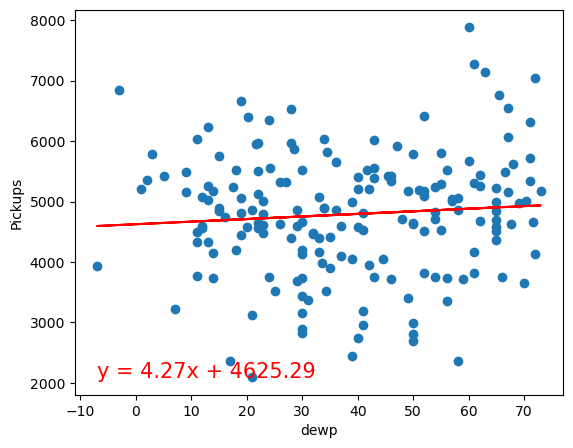

The correlation between pickups and the temp is -0.03
The r-squared is: 0.0
The r-value is: -0.03


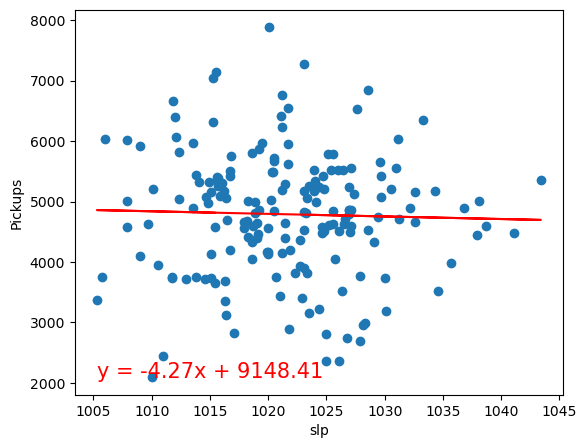

The correlation between pickups and the temp is -0.03
The r-squared is: 0.0
The r-value is: -0.03


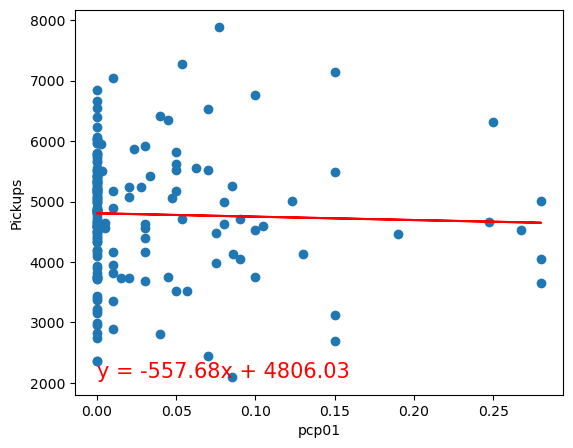

The correlation between pickups and the temp is -0.05
The r-squared is: 0.0
The r-value is: -0.05


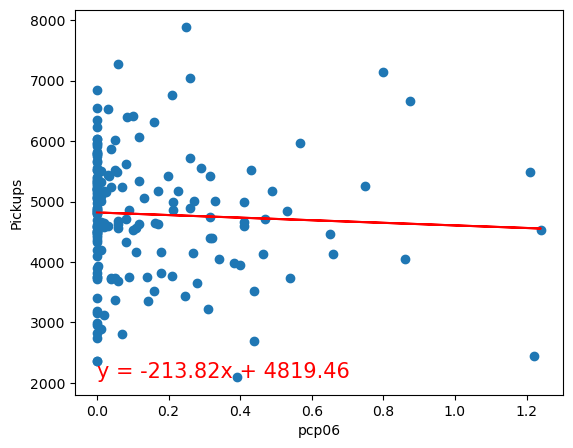

The correlation between pickups and the temp is -0.18
The r-squared is: 0.03
The r-value is: -0.18


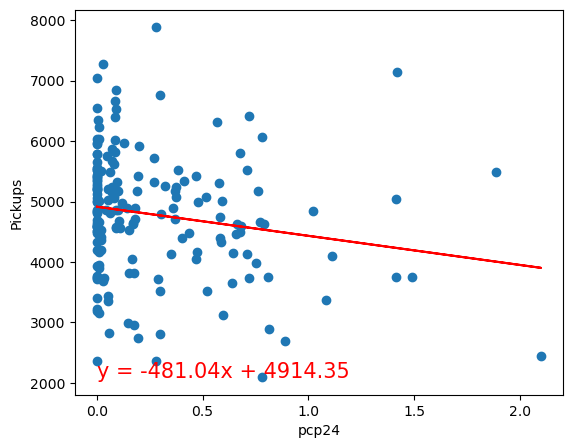

The correlation between pickups and the temp is 0.07
The r-squared is: 0.0
The r-value is: 0.07


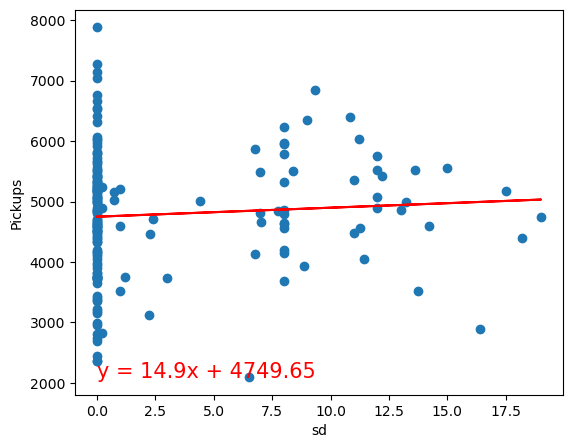

In [83]:
variable_list = ['spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
for variable in variable_list:
    max_df = df.groupby('pickup_date')[['pickups',variable]].max()
    pickups = max_df['pickups']
    variable_data = max_df[variable]
    correlation = st.pearsonr(variable_data,pickups)
    print(f"The correlation between pickups and the temp is {round(correlation[0],2)}")
    plt.figure(figsize=(6.3,5))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data,pickups)
    regress_values = (variable_data * slope + intercept)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(variable_data, pickups)
    plt.plot(variable_data, regress_values,"r-")
    plt.annotate(line_eq, (min(variable_data),min(pickups)), fontsize=15, color="red")

    plt.ylabel("Pickups")
    plt.xlabel(f"{variable}")
    print(f"The r-squared is: {round(rvalue**2, 2)}")
    print(f"The r-value is: {round(rvalue, 2)}")


    plt.show()

The correlation between pickups and the temp is 0.01
The r-squared is: 0.0
The r-value is: 0.01


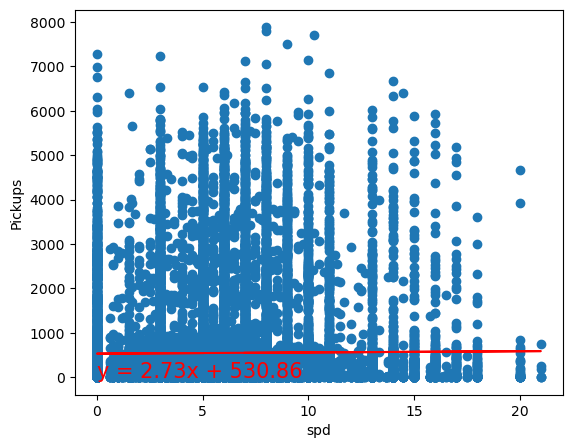

The correlation between pickups and the temp is -0.01
The r-squared is: 0.0
The r-value is: -0.01


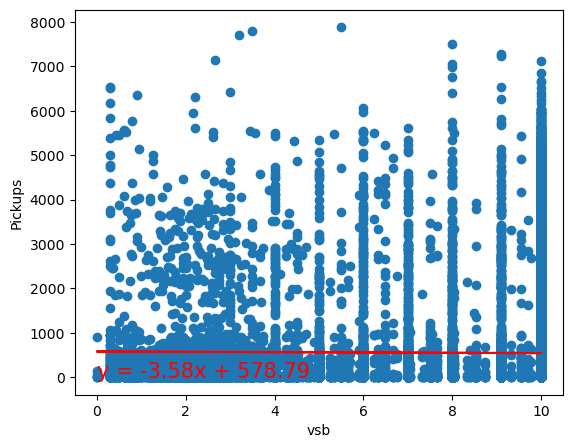

The correlation between pickups and the temp is 0.06
The r-squared is: 0.0
The r-value is: 0.06


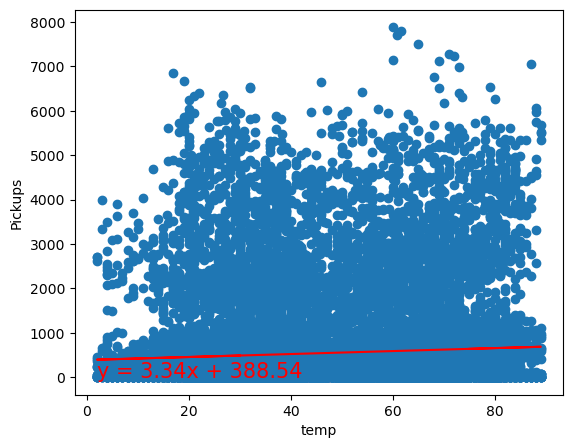

The correlation between pickups and the temp is 0.04
The r-squared is: 0.0
The r-value is: 0.04


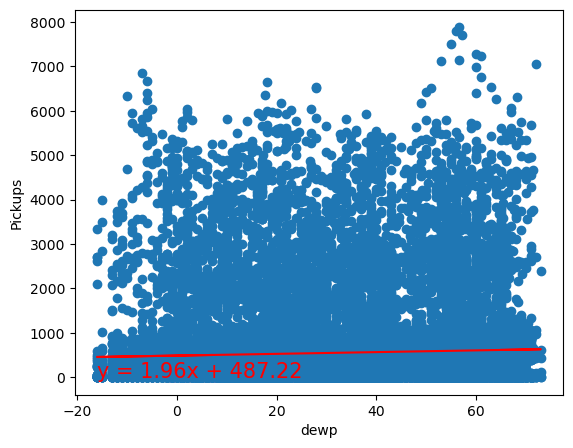

The correlation between pickups and the temp is -0.02
The r-squared is: 0.0
The r-value is: -0.02


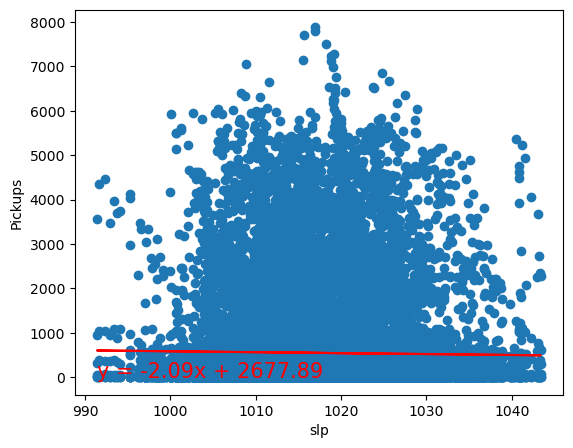

The correlation between pickups and the temp is 0.01
The r-squared is: 0.0
The r-value is: 0.01


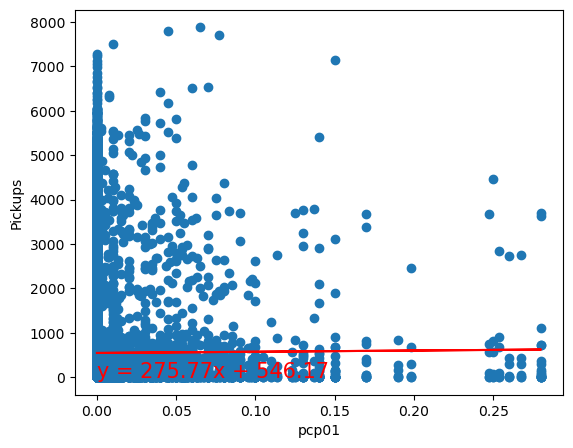

The correlation between pickups and the temp is -0.0
The r-squared is: 0.0
The r-value is: -0.0


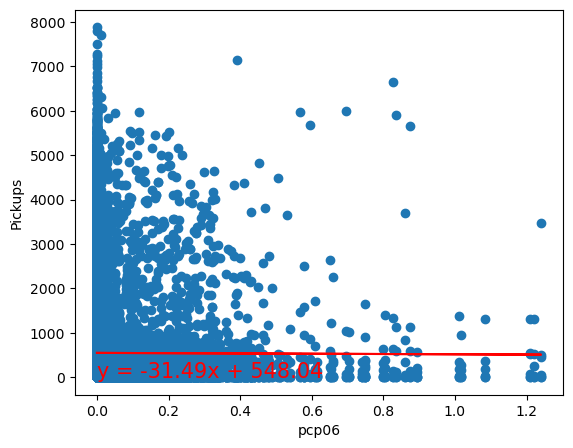

The correlation between pickups and the temp is -0.02
The r-squared is: 0.0
The r-value is: -0.02


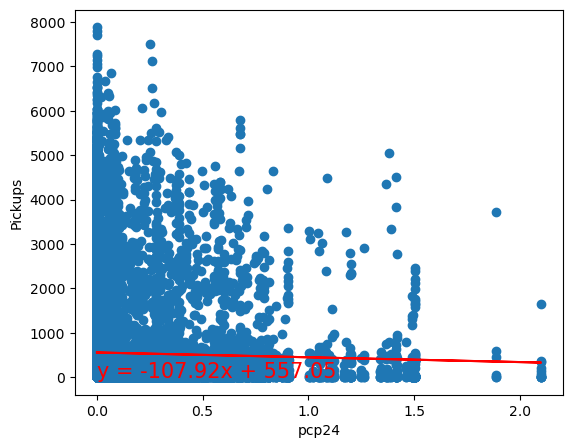

The correlation between pickups and the temp is -0.01
The r-squared is: 0.0
The r-value is: -0.01


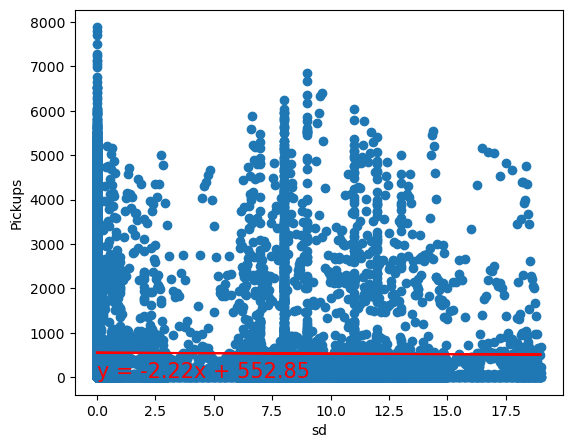

In [80]:
variable_list = ['spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
for variable in variable_list:
    pickups = df['pickups']
    variable_data = df[variable]
    correlation = st.pearsonr(variable_data,pickups)
    print(f"The correlation between pickups and the temp is {round(correlation[0],2)}")
    plt.figure(figsize=(6.3,5))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data,pickups)
    regress_values = (variable_data * slope + intercept)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(variable_data, pickups)
    plt.plot(variable_data, regress_values,"r-")
    plt.annotate(line_eq, (min(variable_data),min(pickups)), fontsize=15, color="red")

    plt.ylabel("Pickups")
    plt.xlabel(f"{variable}")
    print(f"The r-squared is: {round(rvalue**2, 2)}")
    print(f"The r-value is: {round(rvalue, 2)}")


    plt.show()

In [47]:
borough_df = df.groupby('borough')[['pickups','temp']].max()
borough_df

,pickups,temp
borough,,
Bronx,262,89.0
Brooklyn,2009,89.0
EWR,2,89.0
Manhattan,7883,89.0
Queens,831,89.0
Staten Island,13,89.0


In [48]:
min_borough_df = df.groupby('borough')[['pickups','temp']].min()
min_borough_df

,pickups,temp
borough,,
Bronx,0,2.0
Brooklyn,0,2.0
EWR,0,2.0
Manhattan,0,2.0
Queens,0,2.0
Staten Island,0,2.0


In [49]:
# Start by getting the last (greatest) timepoint for each mouse
max = df.groupby("borough")["temp"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(max, df, on=["borough","temp"], how="left")
merged 

,borough,temp,pickup_date,pickup_time,pickups,spd,vsb,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,Bronx,89.0,2015-06-11,20:00:00,67,5.0,6.0,66.0,1010.9,0.0,0.098333,0.255,0.0,N
1,Bronx,89.0,2015-06-11,21:00:00,69,3.0,6.0,67.0,1010.8,0.0,0.118333,0.295,0.0,N
2,Bronx,89.0,2015-06-11,23:00:00,70,5.0,7.0,66.0,1011.0,0.0,0.118333,0.325,0.0,N
3,Bronx,89.0,2015-06-23,18:00:00,77,7.0,9.1,71.0,1008.6,0.0,0.000000,0.000,0.0,N
4,Brooklyn,89.0,2015-06-11,20:00:00,890,5.0,6.0,66.0,1010.9,0.0,0.098333,0.255,0.0,N
5,Brooklyn,89.0,2015-06-11,21:00:00,977,3.0,6.0,67.0,1010.8,0.0,0.118333,0.295,0.0,N
6,Brooklyn,89.0,2015-06-11,23:00:00,1099,5.0,7.0,66.0,1011.0,0.0,0.118333,0.325,0.0,N
7,Brooklyn,89.0,2015-06-23,18:00:00,925,7.0,9.1,71.0,1008.6,0.0,0.000000,0.000,0.0,N
8,EWR,89.0,2015-06-11,20:00:00,0,5.0,6.0,66.0,1010.9,0.0,0.098333,0.255,0.0,N
9,EWR,89.0,2015-06-11,21:00:00,0,3.0,6.0,67.0,1010.8,0.0,0.118333,0.295,0.0,N


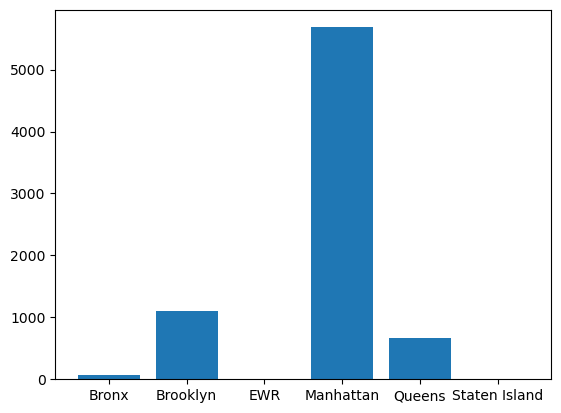

In [50]:
plt.bar(merged['borough'],merged['pickups'],align="center")
plt.show()

In [51]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [52]:
borough_list = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']


borough_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in borough_list:
    new_df = df.loc[df["borough"] == x]
    temperature_data = new_df[["temp",'pickups']]
    borough_data.append(temperature_data)
borough_data

[       temp  pickups
 0      30.0      152
 6      30.0      120
 12     30.0      132
 18     29.0      128
 24     28.0       87
 ...     ...      ...
 26028  80.0       88
 26034  80.0       66
 26040  76.0       57
 26046  76.0       53
 26052  75.0       67
 
 [4343 rows x 2 columns],
        temp  pickups
 1      30.0     1519
 7      30.0     1229
 13     30.0     1601
 19     29.0     1390
 25     28.0      759
 ...     ...      ...
 26029  80.0      777
 26035  80.0      817
 26041  76.0      829
 26047  76.0      860
 26053  75.0      990
 
 [4343 rows x 2 columns],
        temp  pickups
 2      30.0        0
 8      30.0        0
 14     30.0        0
 20     29.0        0
 26     28.0        0
 ...     ...      ...
 26030  80.0        0
 26036  80.0        0
 26042  76.0        0
 26048  76.0        0
 26054  75.0        0
 
 [4343 rows x 2 columns],
        temp  pickups
 3      30.0     5258
 9      30.0     4345
 15     30.0     4577
 21     29.0     3003
 27     28.0  

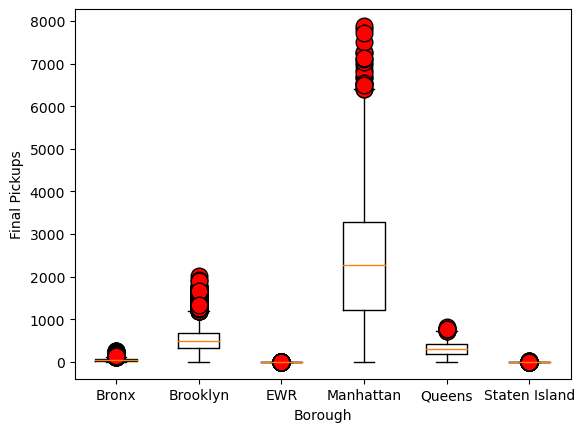

<Figure size 630x500 with 0 Axes>

In [53]:
borough_list = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']

borough_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in borough_list:
    new_df = df.loc[df["borough"] == x]
    temperature_data = new_df['pickups']
    borough_data.append(temperature_data)

    quartiles = temperature_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq= quartiles[.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = new_df[(new_df['pickups'] < lower_bound) |
                            (new_df['pickups'] > upper_bound)]
    
fig, ax = plt.subplots()
plt.figure(figsize=(6.3,5))
bp = ax.boxplot(borough_data, labels=borough_list) 
plt.setp(bp["fliers"], marker="o", markersize=12, markerfacecolor="r", markeredgecolor="black", alpha=1)

ax.set_xlabel("Borough")
ax.set_ylabel("Final Pickups")


plt.show()

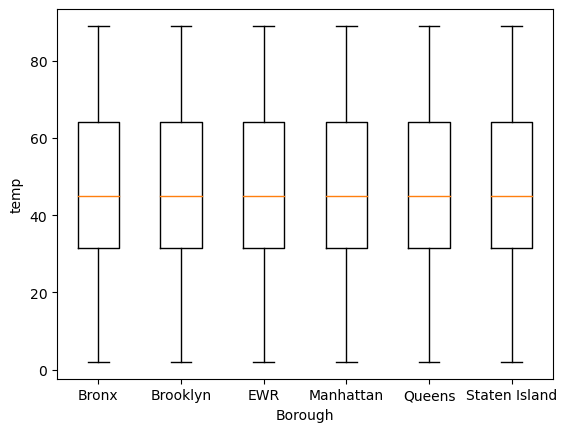

<Figure size 630x500 with 0 Axes>

In [54]:
borough_list = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']

borough_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in borough_list:
    new_df = df.loc[df["borough"] == x]
    temperature_data = new_df['temp']
    borough_data.append(temperature_data)

    quartiles = temperature_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq= quartiles[.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = new_df[(new_df['temp'] < lower_bound) |
                            (new_df['temp'] > upper_bound)]
    
fig, ax = plt.subplots()
plt.figure(figsize=(6.3,5))
bp = ax.boxplot(borough_data, labels=borough_list) 
plt.setp(bp["fliers"], marker="o", markersize=12, markerfacecolor="r", markeredgecolor="black", alpha=1)

ax.set_xlabel("Borough")
ax.set_ylabel("temp")


plt.show()